In [36]:
import vtk
from vtk.numpy_interface import dataset_adapter as dsa
from scipy.optimize import minimize
from scipy.spatial import distance
import ipyvolume as ipv
import numpy as np
from skimage import io

def opt_circ(v,pt):
    x = v[0:2]
    r = v[2]
    dist_ar = distance.cdist(pt,[x],'euclidean')
    diff = np.abs(dist_ar - r)
    
    return np.mean(diff)

reader = vtk.vtkSTLReader()
reader.SetFileName("contour.stl")
reader.Update()

height = 2.3

cutPlane = vtk.vtkPlane()
cutPlane.SetOrigin(0, 0, 0)
cutPlane.SetNormal(0, 0, 1)
cutPlane.SetOrigin(0, 0, height)

cutter = vtk.vtkCutter()
cutter.SetCutFunction(cutPlane)
cutter.SetInputData(reader.GetOutput())

stripper = vtk.vtkStripper()
stripper.SetInputConnection(cutter.GetOutputPort())
stripper.JoinContiguousSegmentsOn()
stripper.Update()

contour = stripper.GetOutput()

b_box = contour.GetBounds()

lw_b = np.min(b_box)
up_b = np.max(b_box)

center = contour.GetCenter()
lgt = contour.GetLength()

py_contour = dsa.WrapDataObject(contour)
pt = py_contour.GetPoints()[:,:2]

x0 = np.array([center[0],center[1],lgt])
bds = [(b_box[0],b_box[1]),(b_box[2],b_box[3]),(0,None)]
sol = minimize(opt_circ,x0,bounds = bds, args=(pt,))

print(sol.x)


[4.23198804 4.29309832 4.01413117]


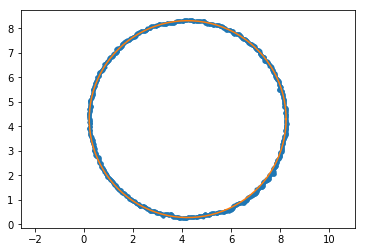

      fun: 0.024561486975326674
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.00071473, 0.0007029 , 0.00135685])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 152
      nit: 14
   status: 0
  success: True
        x: array([4.23198804, 4.29309832, 4.01413117])


In [47]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import mpld3
mpld3.enable_notebook()

an = np.linspace(0, 2 * np.pi, 100)

x,y,r = sol.x

fig, ax = plt.subplots()

ax.plot(pt[:,0], pt[:,1], '.')
ax.plot(r*np.cos(an)+x,r*np.sin(an)+y)
ax.axis('equal')

plt.show()

print(sol)